#A) Business Background

##Business Requirement and Objective

[Intermediate Milestone 1](https://docs.google.com/document/d/1T-QNIPeOXLRKCygaumDPOhpxUYuHdTeMrIKsTnJE6NY/edit)


Mr Djoko as head of data, give you this problem to solve
"What kinds of thematic campaigns that we can recommend to the marketing team for the next month?"
In the next month, the marketing team wants to create a thematic campaign based on user preference. You, as data analyst will be tasked to create a segmentation for this thematic campaign and give recommendations (as objective) on the themes on each campaign.

####**User Dataset (spreadsheet):**
* https://docs.google.com/spreadsheets/d/1WgRURj8L3ppnSCaw58c-wciTiIQf0Hx3XHMCh-enszs/edit#gid=1006069850

####**Stock Transaction (Google Drive):**
* https://docs.google.com/spreadsheets/d/1_H88HSx4sf3QFo1gpDfjjFqVb7BgVKOPUZJa2v7ID1s/edit#gid=1836251069

####**Data Dictionary:**
* https://docs.google.com/spreadsheets/d/1gzGutT2kczT0dbEwDqqa27p6MMOYQuZWvV2MUqNPY6c/edit#gid=11806652849

#B) Data Preparation

## Import Library

In [ ]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

## Import Dataset

### Users (Spreadsheet)

In [ ]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1WgRURj8L3ppnSCaw58c-wciTiIQf0Hx3XHMCh-enszs/edit#gid=1006069850'
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

print(sheet_url_replace) #To show the link to csv

df_users_og = pd.read_csv(sheet_url_replace) #to load/read the csv into pandas dataframe
df_users_og.head() #Show only first 5 rows

https://docs.google.com/spreadsheets/d/1WgRURj8L3ppnSCaw58c-wciTiIQf0Hx3XHMCh-enszs/export?format=csv&gid=1006069850


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,43195,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis,0,0,0
1,47757,2021-10-02 18:44:56,Male,25,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji,10000000,0,0
3,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,4100000,3100000,0
4,51883,2021-09-29 12:06:17,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0


In [ ]:
df_users_og.head(10) #Show only first 5 rows

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,43195,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis,0,0,0
1,47757,2021-10-02 18:44:56,Male,25,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji,10000000,0,0
3,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,4100000,3100000,0
4,51883,2021-09-29 12:06:17,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
5,53759,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,NaN,Gaji,100000,0,0
6,54759,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,12000000,2000000,0
7,61414,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,NaN,Tabungan,0,0,-10000
8,62039,2021-09-18 14:36:23,Male,47,Swasta,> Rp 100 Juta - 500 Juta,used referral,Gaji,0,0,0
9,64204,2021-10-04 19:17:46,Female,24,Pelajar,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0


### Transaction (Spreadsheet)

In [ ]:
#Import dataset from spreadsheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1_H88HSx4sf3QFo1gpDfjjFqVb7BgVKOPUZJa2v7ID1s/edit#gid=1836251069' #assign link to a variable
sheet_url_replace = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=') #to convert the spreadsheet format into csv

print(sheet_url_replace) #To show the link to csv

df_Transaction_og = pd.read_csv(sheet_url_replace) #Import/read the csv file into pandas dataframe
df_Transaction_og.head()

https://docs.google.com/spreadsheets/d/1_H88HSx4sf3QFo1gpDfjjFqVb7BgVKOPUZJa2v7ID1s/export?format=csv&gid=1836251069


,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000


**Data Dictionary :**
* **user_id**	Client ID on the platform
* **date**	Date of the transaction
* **buy_saham_transaction_amount**	Amount of Saham mutual fund that are bought by user at that date
* **sell_saham_transaction_amount**	Amount of Saham mutual fund that are sell by user at that date
* **buy_pasar_uang_transaction_amount**	Amount of Pasar Uang mutual fund that are bought by user at that date
* **sell_pasar_uang_transaction_amount**	Amount of Pasar Uang mutual fund that are sell by user at that date
* **buy_pendapatan_tetap_transaction_amount**	Amount of Pendapatan Tetap mutual fund that are bought by user at that date
* **sell_pendapatan_tetap_transaction_amount**	Amount of Pendapatan Tetap mutual fund that are sell by user at that date
* **buy_campuran_transaction_amount**	Amount of Campuran mutual fund that are bought by user at that date
* **sell_campuran_transaction_amount**	Amount of Campuran mutual fund that are sell by user at that date
* **total_buy_transaction_amount**	Total mutual fund that are bought by user at that date
* **total_sell_transaction_amount**	Total mutual fund that are sell by user at that date
* **saham_invested_amount	Amount** of Saham mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **pasar_uang_invested_amount**	Amount of Pasar Uang mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **pendapatan_tetap_invested_amount**	Amount of Pendapatan Tetap mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **campuran_invested_amount**	Amount of Campuran mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)
* **total_invested_amount	Total** amount of mutual fund that are owned by user at that date (decrease from Day-1 if sell, increase if buy)

Insight
* Lowest Buy Transaction Amount at 08/04
* Highest  Buy Transaction Amount at 08/20
* Overall the trend is Stable

#C) Data Cleaning

Steps to do :
* Unique Values (Remove irrelevant values)
* Treating missing values (state the reasoning)
* Outliers (in Transaction & annual_income using IQR)
* Check Duplicates, retain only the first record
* Check data & convert data types
* Check typos
* Check time series data
* Merge the dataset

### Users

In [ ]:
#Make a copy of the original data for data cleaning
df_users_dc = df_users_og.copy()

In [ ]:
df_users_dc.head() #Showing 5 data records

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount
0,43195,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,NaN,Keuntungan Bisnis,0,0,0
1,47757,2021-10-02 18:44:56,Male,25,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,NaN,Gaji,10000000,0,0
3,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji,4100000,3100000,0
4,51883,2021-09-29 12:06:17,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,NaN,Gaji,0,0,0


####Check Data Type

In [ ]:
df_users_dc.shape #Check how much column and rows

(14712, 11)

In [ ]:
df_users_dc.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [ ]:
df_users_dc.isnull().sum() #Check how much null values exist

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

Insight :

* user_id can be changed into string
* registration_import_datetime can be changed into datetime
* referral_code_used, 9108 row null

#### Check for values and Typo



In [ ]:
df_users_dc.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

Recommendation :

 2 Option :
  1. Just remove the data (column) since it's so diverse
  2. Make a new category

Here we just exclude the column

Recommendation :
*  Can be made into bin or a new category




In [ ]:
#Check user_id unique values
df_users_dc[df_users_dc.columns[0]].value_counts()

43195      1
4152559    1
4152622    1
4152641    1
4152668    1
          ..
3895316    1
3895352    1
3895385    1
3895536    1
4457700    1
Name: user_id, Length: 14712, dtype: int64

Insight

This data type should be int

We will change the id data type from int into string

In [ ]:
#Check registration_import_datetime unique values
df_users_dc[df_users_dc.columns[1]].value_counts()

2021-08-05 10:18:13    5
2021-09-01 19:28:19    5
2021-09-05 15:12:38    5
2021-10-01 16:49:54    5
2021-09-17 14:10:39    5
                      ..
2021-08-29 01:10:33    1
2021-08-29 01:10:32    1
2021-08-29 01:11:10    1
2021-09-24 06:07:11    1
2021-10-27 12:35:20    1
Name: registration_import_datetime, Length: 11536, dtype: int64

Insight

This data type should be time series

Recomendation

convert data from int to datetime

In [ ]:
#Check user_gender unique values
df_users_dc[df_users_dc.columns[2]].value_counts()

Male      8977
Female    5735
Name: user_gender, dtype: int64

In [ ]:
#Check user_occupationr unique values
df_users_dc[df_users_dc.columns[3]].value_counts()

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
35     262
34     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
66       3
67       3
71       3
69       2
82       1
74       1
83       1
76       1
73       1
Name: user_age, dtype: int64

insight

This data note clean becasue many age and must group by range age

Recomendation

Can be made into bin or a new category

In [ ]:
#Check user_occupation unique values
df_users_dc[df_users_dc.columns[4]].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

In [ ]:
#Check user_income_range unique values
df_users_dc[df_users_dc.columns[5]].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

In [ ]:
#Checking the values for referral_code_used
df_users_dc[df_users_dc.columns[6]].value_counts()

used referral    5604
Name: referral_code_used, dtype: int64

Insight :
* We need to check on "nan"
* There are multiple typo

Recommendation
* Clean the typo
* Since "nan" only 1 data we can covert "nan" to not "used referral code"

In [ ]:
#Check user_income_source unique values
df_users_dc[df_users_dc.columns[7]].value_counts()

Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source, dtype: int64

In [ ]:
#Checking end_of_month_invested_amount uique values
df_users_dc[df_users_dc.columns[8]].value_counts()

0           8528
100000      1107
10000        686
200000       470
500000       250
            ... 
14800000       1
2350522        1
12035000       1
2433603        1
30779          1
Name: end_of_month_invested_amount, Length: 1042, dtype: int64

In [ ]:
#Checking total_buy_amount uique values
df_users_dc[df_users_dc.columns[9]].value_counts()

0           11206
100000        399
25000         298
200000        157
10000         152
            ...  
12200000        1
374000          1
12325000        1
13760000        1
1190000         1
Name: total_buy_amount, Length: 824, dtype: int64

In [ ]:
#Checking total_sell_amount uique values
df_users_dc[df_users_dc.columns[10]].value_counts()

 0           12216
-10000         494
-100000        440
-200000        112
-500000         75
             ...  
-189435          1
-50000000        1
-5587799         1
-506037          1
-35988           1
Name: total_sell_amount, Length: 548, dtype: int64

#### Treat Data & Missing Values

In [ ]:
df_users_dc.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

We will change the user id data type from int into string

In [ ]:
df_users_dc['user_id'] = df_users_dc['user_id'].astype(str)   #Change user_id data type into string

In [ ]:
df_users_dc['user_id'].dtype #Check the datatype of id after replaced

dtype('O')


O stands for object, the data succesfult converted into string

We will change the registration_import_datetime data type from int into datetime

In [ ]:
df_users_dc['registration_import_datetime'] = pd.to_datetime(df_users_dc['registration_import_datetime'])
#Change registration_import_datetime data type into date time

In [ ]:
df_users_dc['registration_import_datetime'].dtype
#Check the datatype of registration_import_datetime after replaced

dtype('<M8[ns]')

ns stands for object, the data succesfult converted into data time

**Missing Values in referral_code_used**

We will change the "nan" in referral_code_used data to 'not used refferal'

In [ ]:
df_users_dc['referral_code_used'] = df_users_dc['referral_code_used'].fillna('not used referral')
#Change the datatype of referral_code_used after innto nan to not used referral code

In [ ]:
df_users_dc[df_users_dc.columns[6]].isna().sum()
#Check the datatype of referral_code_used after replaced


0

not null 0, sucsesfull change the "nan" in referral_code_used data to 'not used refferal'

In [ ]:
df_users_dc.info() #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
dtypes: datetime64[ns](1), int64(

In [ ]:
#Confirm whether null data still exist
df_users_dc.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
dtype: int64

insight
* Data type user_id is obcject we sucsesful changed into string
* Data type registration_import_datetime is datetime we sucsesful changed into datetime
* 0 mean not found nan

####Data Manipulation

**Creating a bin for the user_age**

In [ ]:
df_users_dc['user_age'].value_counts() #To confirm the data after we create the categories

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
35     262
34     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
66       3
67       3
71       3
69       2
82       1
74       1
83       1
76       1
73       1
Name: user_age, dtype: int64

In [ ]:
a = df_users_dc['user_age']   # To make it easier to assign the data into the bin / category we assign the column into a variable

# Here we also decided to assign it into different column
# We make a condition to assign data into category
def age_category(a):
    if   12 < a <= 25 : return 'Teenager'
    elif 26 < a <= 45 : return 'Adult'
    elif 46 < a <= 65 : return 'Late Adult'
    else: return 'Elderly'

# Add new column to put the value based on condition
df_users_dc['age_category'] = df_users_dc['user_age'].map(age_category)

In [ ]:
df_users_dc['age_category'].value_counts()

Teenager      7948
Adult         5287
Elderly        841
Late Adult     636
Name: age_category, dtype: int64

In [ ]:
df_users_dc['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

**insight**

* in here mostly teenager Which is Pelajar , asmuch 7887 user pelajar and follow wroker as swasta and etc.

####Check Duplicates

In [ ]:
#Check the duplicate
df_users_dc[df_users_dc['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_category


It is showing that duplicate data are exist, so we need to remove it based on the id since 1 id in user should be only 1 per id.

#### Users Clean Data

In [ ]:
df_users = df_users_dc.copy() #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_users.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount,age_category
0,43195,2021-10-03 21:37:55,Female,36,Pengusaha,> Rp 50 Juta - 100 Juta,not used referral,Keuntungan Bisnis,0,0,0,Adult
1,47757,2021-10-02 18:44:56,Male,25,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Gaji,0,0,0,Teenager
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,0,Adult
3,50961,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Gaji,4100000,3100000,0,Adult
4,51883,2021-09-29 12:06:17,Male,27,Pelajar,> Rp 50 Juta - 100 Juta,not used referral,Gaji,0,0,0,Adult


**SUUMMERY CLEANING DATA**

In [ ]:
df_users_dc.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
age_category                    0
dtype: int64

In [ ]:
df_users.info()   #For summary after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
 8   end_of_month_invested_amount  14712 non-null  int64         
 9   total_buy_amount              14712 non-null  int64         
 10  total_sell_amount             14712 non-null  int64         
 11  age_category                

Insight

* Data type user_id is obcject we sucsesful changed into string
* Data type registration_import_datetime is datetime we sucsesful changed into datetime
* sucsesfull change the "nan" in referral_code_used data to 'not used refferal'
* 0 mean not found nan
* Duplicate in data user not found

### Transaction

In [ ]:
df_Transaction_dc = df_Transaction_og.copy()  #Create a copy of original data

In [ ]:
df_Transaction_og.head()   #To check the snippet of the data

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0,0,NaN,NaN,NaN,10000000.000,10000000


####Check Data Type & Missing Values

In [ ]:
df_Transaction_og.shape    #Check how much column and rows

(158811, 17)

In [ ]:
df_Transaction_og.info()   #Check table info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [ ]:
df_Transaction_dc.isna().sum() #check nan in data transaction

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

In [ ]:
#Checking the values for loan_status
df_Transaction_dc[df_Transaction_dc.columns[0]].value_counts()

3734324    42
3736817    42
3734576    42
3734536    42
3736922    42
           ..
4078289     1
1905565     1
4143822     1
4143651     1
4165830     1
Name: user_id, Length: 8277, dtype: int64

In [ ]:
#Checking the values for date
df_Transaction_dc[df_Transaction_dc.columns[1]].value_counts()

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name: date, dtype: int64

In [ ]:
#Checking the values for buy_saham_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[2]].value_counts()

0.000          95560
100000.000       458
10000.000        286
50000.000        228
40000.000        179
               ...  
2040000.000        1
485142.000         1
2540000.000        1
163543.000         1
23837.000          1
Name: buy_saham_transaction_amount, Length: 422, dtype: int64

In [ ]:
#Checking the values for sell_saham_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[3]].value_counts()

-50000.000      265
-10000.000      187
-40000.000      136
-100000.000     132
-60000.000      108
               ... 
-49435.000        1
-1862599.000      1
-3725200.000      1
-396037.000       1
-10988.000        1
Name: sell_saham_transaction_amount, Length: 386, dtype: int64

In [ ]:
#Checking the values for buy_pasar_uang_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[5]].value_counts()

-10000.000      846
-20000.000      153
-100000.000     146
-40000.000       93
-50000.000       60
               ... 
-39974.000        1
-49791.000        1
-2280000.000      1
-909820.000       1
-49983.000        1
Name: sell_pasar_uang_transaction_amount, Length: 311, dtype: int64

In [ ]:
#Checking the values for buy_pendapatan_tetap_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[6]].value_counts()

0.000          94830
25000.000        724
100000.000       316
50000.000        251
40000.000        165
               ...  
7000000.000        1
4280000.000        1
4290000.000        1
4238000.000        1
1720000.000        1
Name: buy_pendapatan_tetap_transaction_amount, Length: 502, dtype: int64

In [ ]:
#Checking the values for sell_pasar_uang_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[7]].value_counts()

-40000.000     225
-50000.000     153
-10000.000     114
-30000.000     101
-20000.000      65
              ... 
-99919.000       1
-225000.000      1
-33333.000       1
-949569.000      1
-169989.000      1
Name: sell_pendapatan_tetap_transaction_amount, Length: 345, dtype: int64

In [ ]:
#Checking the values for buy_pendapatan_tetap_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[8]].value_counts()

0.000           4941
1000000.000       32
2000000.000       20
10000000.000      10
100000.000         9
1500000.000        6
2500000.000        6
150000.000         4
5000000.000        4
500000.000         4
300000.000         3
20000000.000       3
3000000.000        3
15000000.000       2
1035000.000        2
50000000.000       2
9000000.000        2
50000.000          2
200000.000         2
6000000.000        2
13050000.000       1
901102.000         1
3074900.000        1
149000.000         1
1100000.000        1
13000000.000       1
1350000.000        1
975000.000         1
5300000.000        1
1057000.000        1
7500000.000        1
24000000.000       1
8000000.000        1
Name: buy_campuran_transaction_amount, dtype: int64

In [ ]:
#Checking the values for sell_pendapatan_tetap_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[9]].value_counts()

-1000000.000     13
-100000.000       5
-5000000.000      3
-200000.000       3
-2500000.000      2
-10000000.000     2
-4343762.000      1
-500000.000       1
-300000.000       1
-4000000.000      1
-50000000.000     1
-30000000.000     1
-3000000.000      1
-1500000.000      1
-4300000.000      1
-15656238.000     1
-700000.000       1
-550000.000       1
-2093257.000      1
-1028726.000      1
-1054481.000      1
-3500000.000      1
-1001600.000      1
-50000.000        1
Name: sell_campuran_transaction_amount, dtype: int64

In [ ]:
#Checking the values for total_buy_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[10]].value_counts()

0            151003
100000         1367
25000           712
10000           603
500000          472
              ...  
989177            1
245873            1
485142            1
400000000         1
2280000           1
Name: total_buy_transaction_amount, Length: 816, dtype: int64

In [ ]:
#Checking the values total_sell_transaction_amount
df_Transaction_dc[df_Transaction_dc.columns[11]].value_counts()

 0          155490
-10000         583
-100000        555
-50000         127
-200000        126
             ...  
-330307          1
-181877          1
-6786500         1
-92000           1
-10988           1
Name: total_sell_transaction_amount, Length: 765, dtype: int64

In [ ]:
#Checking the values for saham_invested_amount
df_Transaction_dc[df_Transaction_dc.columns[12]].value_counts()

0.000         23793
50000.000     11944
40000.000      6768
10000.000      5831
100000.000     5184
              ...  
109998.000        1
284000.000        1
184000.000        1
231589.000        1
388446.000        1
Name: saham_invested_amount, Length: 1084, dtype: int64

In [ ]:
#Checking the values for pasar_uang_invested_amount
df_Transaction_dc[df_Transaction_dc.columns[13]].value_counts()

10000.000       30274
0.000           28629
100000.000      10064
20000.000        9031
40000.000        4854
                ...  
12300000.000        1
289946.000          1
539946.000          1
219758.000          1
20779.000           1
Name: pasar_uang_invested_amount, Length: 1157, dtype: int64

In [ ]:
#Checking the values for pendapatan_tetap_invested_amount
df_Transaction_dc[df_Transaction_dc.columns[14]].value_counts()

0.000           20699
40000.000       10800
50000.000        7073
30000.000        4522
100000.000       3941
                ...  
490500.000          1
1215000.000         1
3465000.000         1
5025000.000         1
83400000.000        1
Name: pendapatan_tetap_invested_amount, Length: 1386, dtype: int64

In [ ]:
#Checking the values for campuran_invested_amount
df_Transaction_dc[df_Transaction_dc.columns[15]].value_counts()

1000000.000     1122
0.000            521
2000000.000      488
100000.000       409
10000000.000     389
                ... 
37074900.000       1
17074900.000       1
26000000.000       1
52000000.000       1
650000.000         1
Name: campuran_invested_amount, Length: 88, dtype: int64

In [ ]:
#Checking the values for total_invested_amount
df_Transaction_dc[df_Transaction_dc.columns[16]].value_counts()

0            32577
100000       25932
10000        11192
200000        9936
500000        6069
             ...  
74000000         1
578400000        1
76000000         1
1890000          1
30779            1
Name: total_invested_amount, Length: 2727, dtype: int64

Insight :
* User_id can be changed into string
* date we can be changed datetime
* buy_saham_transaction_amount 59780 rows is nan
* sell_saham_transaction_amount 157003 rows is nan
* buy_pasar_uang_transaction_amount 36548 rows is nan
* sell_pasar_uang_transaction_amount 165801 rows is nan
* buy_pendapatan_tetap_transaction_amount 59895 rows is nan
* sell_pendapatan_tetap_transaction_amount 157230 rows is nan
* buy_campuran_transaction_amount 153739 is nan
* saham_invested_amount 52519 is nan
* sell_campuran_transaction_amount 27730 is nan
* pasar_uang_invested_amount 52865 is nan
* pendapatan_tetap_invested_amount 153459 is nan


**Step**

* Change the user_id type from int into string
* Change the date type from int into date time
* Reaplace all nan row to 0

#### Treat Data Type & Missing Values

In [ ]:
#Change the id data type into string
df_Transaction_dc['user_id'] = df_Transaction_dc['user_id'].astype(str)

In [ ]:
#To convert the date into datetime data type

df_Transaction_dc['date'] = pd.to_datetime(df_Transaction_dc['date'])

In [ ]:
df_Transaction_dc = df_Transaction_dc.fillna(0)
#Reaplace all nan row to 0

In [ ]:
df_Transaction_dc.info() #check table transaction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

In [ ]:
df_Transaction_dc.isna().sum() #check nan in data transaction

user_id                                     0
date                                        0
buy_saham_transaction_amount                0
sell_saham_transaction_amount               0
buy_pasar_uang_transaction_amount           0
sell_pasar_uang_transaction_amount          0
buy_pendapatan_tetap_transaction_amount     0
sell_pendapatan_tetap_transaction_amount    0
buy_campuran_transaction_amount             0
sell_campuran_transaction_amount            0
total_buy_transaction_amount                0
total_sell_transaction_amount               0
saham_invested_amount                       0
pasar_uang_invested_amount                  0
pendapatan_tetap_invested_amount            0
campuran_invested_amount                    0
total_invested_amount                       0
dtype: int64

**Insight**
* Sucses Change the user_id type from int into string
* Sucses Change the date type from int into date time
* Sucses Reaplace all nan row to 0

#### Check Duplicates

In [ ]:
#Check the duplicate
df_Transaction_dc[df_Transaction_dc.duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


#### Transaction Clean Data

In [ ]:
df_Transaction_dc = df_Transaction_dc.copy()  #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_Transaction_dc.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
1,50701,2021-08-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
2,50701,2021-09-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
3,50701,2021-09-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
4,50701,2021-09-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000


In [ ]:
df_Transaction_dc.info() #For summary after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              158811 non-null  float64       
 3   sell_saham_transaction_amount             158811 non-null  float64       
 4   buy_pasar_uang_transaction_amount         158811 non-null  float64       
 5   sell_pasar_uang_transaction_amount        158811 non-null  float64       
 6   buy_pendapatan_tetap_transaction_amount   158811 non-null  float64       
 7   sell_pendapatan_tetap_transaction_amount  158811 non-null  float64       
 8   buy_campuran_transaction_amount           158811 non-null  float64       
 9   sell_campuran_t

## Merge Data

In [ ]:
#Merge the table
#Since we want to analyze the users and the transaction, it is feels right to have both data available and none of them are null
#Thats why we use inner join
df_merged = df_users.merge(df_Transaction_dc, how='inner', left_on =['user_id'], right_on = ['user_id'])
df_merged.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
1,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
3,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
4,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000


In [ ]:
#To summary the data cleaning and merging
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [ ]:
# Confirm null values of merged data
df_merged.isna().sum()

user_id                                     0
registration_import_datetime                0
user_gender                                 0
user_age                                    0
user_occupation                             0
user_income_range                           0
referral_code_used                          0
user_income_source                          0
end_of_month_invested_amount                0
total_buy_amount                            0
total_sell_amount                           0
age_category                                0
date                                        0
buy_saham_transaction_amount                0
sell_saham_transaction_amount               0
buy_pasar_uang_transaction_amount           0
sell_pasar_uang_transaction_amount          0
buy_pendapatan_tetap_transaction_amount     0
sell_pendapatan_tetap_transaction_amount    0
buy_campuran_transaction_amount             0
sell_campuran_transaction_amount            0
total_buy_transaction_amount      

Insight:
* All null values have been handled.

## Checking Outliers

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [ ]:
# Confirm null values of merged data
df_merged.isna().sum()

user_id                                     0
registration_import_datetime                0
user_gender                                 0
user_age                                    0
user_occupation                             0
user_income_range                           0
referral_code_used                          0
user_income_source                          0
end_of_month_invested_amount                0
total_buy_amount                            0
total_sell_amount                           0
age_category                                0
date                                        0
buy_saham_transaction_amount                0
sell_saham_transaction_amount               0
buy_pasar_uang_transaction_amount           0
sell_pasar_uang_transaction_amount          0
buy_pendapatan_tetap_transaction_amount     0
sell_pendapatan_tetap_transaction_amount    0
buy_campuran_transaction_amount             0
sell_campuran_transaction_amount            0
total_buy_transaction_amount      

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

i= 0 el end_of_month_invested_amount
i= 1 el total_buy_amount
i= 2 el total_sell_amount
i= 3 el buy_saham_transaction_amount
i= 4 el sell_saham_transaction_amount
i= 5 el buy_pasar_uang_transaction_amount
i= 6 el sell_pasar_uang_transaction_amount
i= 7 el buy_pendapatan_tetap_transaction_amount
i= 8 el sell_pendapatan_tetap_transaction_amount
i= 9 el buy_campuran_transaction_amount
i= 10 el sell_campuran_transaction_amount
i= 11 el total_buy_transaction_amount
i= 12 el total_sell_transaction_amount
i= 13 el saham_invested_amount
i= 14 el pasar_uang_invested_amount
i= 15 el pendapatan_tetap_invested_amount
i= 16 el campuran_invested_amount
i= 17 el total_invested_amount


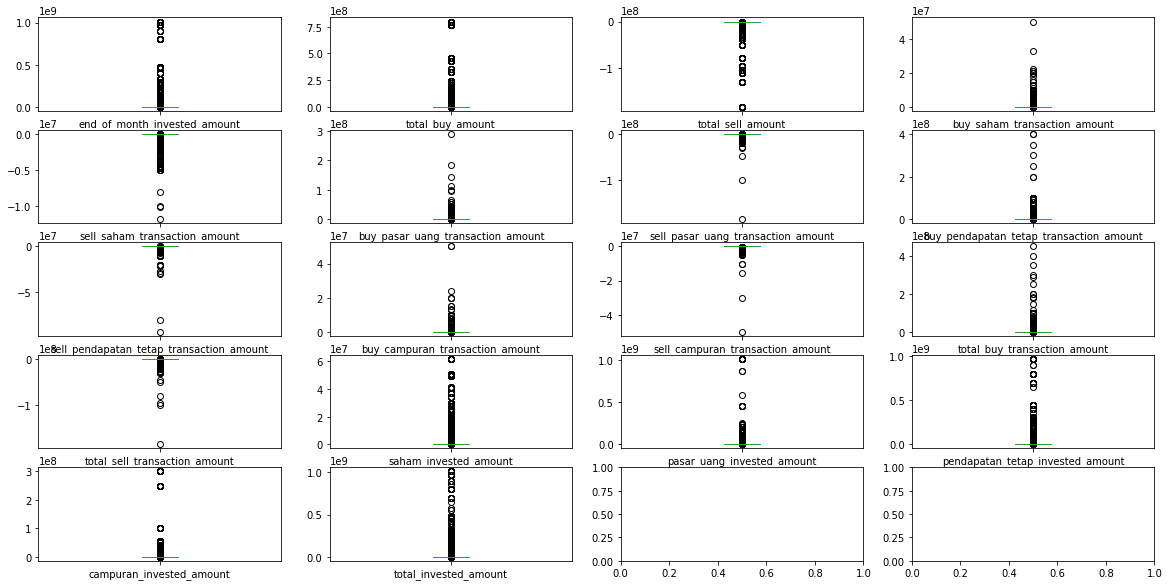

In [ ]:
numerical_column = ['end_of_month_invested_amount','total_buy_amount','total_sell_amount','buy_saham_transaction_amount','sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount','sell_campuran_transaction_amount','total_buy_transaction_amount','total_sell_transaction_amount','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount']

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,10))
for i,el in enumerate(numerical_column):
    print('i=',i,'el',el)
    a = df_merged.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Here we decide not to throw outliers because it might be useful in the next analysis process.

In [ ]:
df_eda = df_merged.copy()

In [ ]:
df_eda.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount', 'age_category', 'date',
       'buy_saham_transaction_amount', 'sell_saham_transaction_amount',
       'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount',
       'total_buy_transaction_amount', 'total_sell_transaction_amount',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount'],
      dtype='object')

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [ ]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['total_invested_amount']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda

,total_invested_amount
count,158811.000
mean,2442450.321
std,24900778.449
min,0.000
25%,10000.000
50%,100000.000
75%,500000.000
max,1012200000.000
kurtosis,986.888
skewness,28.737


# D) EDA

## **QUESTION 1** : How Many Users do we have in our Data

In [ ]:
df_eda['user_id'].describe()

count      158811
unique       8277
top       3734324
freq           42
Name: user_id, dtype: object

Insight</br>
from here we can see the total users we have **8277 Users**

## **QUESTION 2** : How is the Demographic of Our Data

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

### By String Columns

In [ ]:
objects = ['user_id','user_gender','user_occupation','user_income_range','referral_code_used','user_income_source','age_category',]
df_eda[objects].describe()

,user_id,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source,age_category
count,158811,158811,158811,158811,158811,158811,158811
unique,8277,2,9,6,2,10,4
top,3734324,Male,Pelajar,< 10 Juta,not used referral,Gaji,Teenager
freq,42,97149,88865,68500,107440,99611,86585


**Insight**:
* we have 8277 **user**
* Most **user gender** = Male
* Most **user occupation** = Pelajar
* Most **user income range** = < 10 Juta
* Most **referral code used** = don't use referral
* Most **user income source** = Gaji
* Most **age category** = Teenager

### By Numeric Columns

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

numeric = ['end_of_month_invested_amount','total_buy_amount','total_sell_amount','buy_saham_transaction_amount','sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount','sell_pasar_uang_transaction_amount','buy_pendapatan_tetap_transaction_amount','sell_pendapatan_tetap_transaction_amount','buy_campuran_transaction_amount','sell_campuran_transaction_amount','total_buy_transaction_amount','total_sell_transaction_amount','saham_invested_amount','pasar_uang_invested_amount','pendapatan_tetap_invested_amount','campuran_invested_amount','total_invested_amount']

desc_eda = df_eda[numeric].describe()
desc_eda.loc['kurtosis'] = df_eda[numeric].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = df_eda[numeric].skew() #show Skewness statistic
desc_eda.loc['variance'] = df_eda[numeric].var() #show variance statistic
desc_eda

,end_of_month_invested_amount,total_buy_amount,total_sell_amount,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000,158811.000
mean,3007509.972,2001688.761,-450616.893,10014.084,-2903.590,23459.577,-6399.935,41251.280,-4850.310,3346.286,-1118.802,78071.226,-15272.637,296057.589,694075.475,1189113.164,263204.092,2442450.321
std,28083454.054,21171492.890,4822935.009,257986.752,82683.234,1169513.846,570750.873,2319003.801,360839.426,241405.786,159321.680,2723035.017,708837.778,1759649.369,12814706.102,19132867.633,4815055.585,24900778.449
min,0.000,0.000,-185000000.000,0.000,-11766799.000,0.000,-185000000.000,0.000,-92712405.000,0.000,-50000000.000,0.000,-185000000.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,-100000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000.000
50%,100000.000,10000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,10000.000,10000.000,25000.000,0.000,100000.000
75%,600000.000,300000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,100000.000,100000.000,110000.000,0.000,500000.000
max,1012200000.000,799500000.000,0.000,50000000.000,0.000,289200000.000,0.000,400000000.000,0.000,50000000.000,0.000,450000000.000,0.000,61840000.000,1012200000.000,970000000.000,300000000.000,1012200000.000
kurtosis,780.862,952.145,806.841,12627.351,7097.701,30429.624,75836.262,17874.490,43716.169,25201.794,69802.955,12381.496,35226.683,409.128,4768.813,1701.208,2456.404,986.888
skewness,25.604,28.186,-26.142,91.024,-71.583,152.193,-254.896,122.423,-191.275,140.007,-246.879,98.595,-163.012,17.269,63.807,38.318,44.899,28.737


Insight (we don't interpret all the columns, just take some of the interesting ones.) :

* Average **total_buy_amount** are 2001688.761, the median is 10000.000, minimum is 0.000 and the maximum are 799500000.000
* Average **total_sell_amount** are -450616.893, the median is 0.000, minimum is -185000000.000 and the maximum are 0.000
* Most Maximum Buy Amount is Pendapatan Tetap = 400000000.000
* Most Minimum Sell Amount is Pasar Uang = - 185000000.000





### By Date Columns

In [ ]:
datetype = ['registration_import_datetime','date']
df_eda[datetype].describe()

<ipython-input-943-727e84a2b57c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_eda[datetype].describe()


,registration_import_datetime,date
count,158811,158811
unique,6581,42
top,2021-08-02 13:38:02,2021-09-30 00:00:00
freq,164,8277
first,2021-08-01 00:11:14,2021-08-04 00:00:00
last,2021-09-28 13:20:00,2021-09-30 00:00:00


Insight :
* The Registration date of users starts from 2021-08-01 to 2021-09-28
* Most of users registrated at 2021-08-02, 164 Users registrated in this date.
* The Transaction date starts from 2021-08-04 to 2021-09-30


## **QUESTION 3** : How many users buy product in each mutual funds

here I assume that users who have a value of 0 still have the product (maybe in other periods). So only the null value that we drop the row.

### Saham

In [ ]:
# bs = users buy saham
bs = df_eda[['user_id','buy_saham_transaction_amount']]
bs = bs.dropna(axis=0)
bs['user_id'].nunique()



8277

Insight
* Users who buy Saham is 5255 Users

### Pasar Uang

In [ ]:
#bpu = buy pasar uang
bpu = df_eda[['user_id','buy_pasar_uang_transaction_amount']]
bpu = bpu.dropna(axis=0)
bpu['user_id'].nunique()



8277

Insight
* Users who buy Pasar Uang is 6494 Users

### Pendapatan Tetap

In [ ]:
# bpt = buy pendapatan tetap
bpt = df_eda[['user_id','buy_pendapatan_tetap_transaction_amount']]
bpt = bpt.dropna(axis=0)
bpt['user_id'].nunique()

8277

Insight
* Users who buy Pendapatan Tetap is 5270 Users

### Campuran

In [ ]:
# bc = buy campuran
bc = df_eda[['user_id','buy_campuran_transaction_amount']]
bc = bc.dropna(axis=0)
bc['user_id'].nunique()

8277

Insight
* Users who buy Campuran is 231 Users

## **QUESTION 4** : Is there any trend on transaction

### Buy Transaction

<ipython-input-948-5fd63839c796>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_trend['date'] = buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data


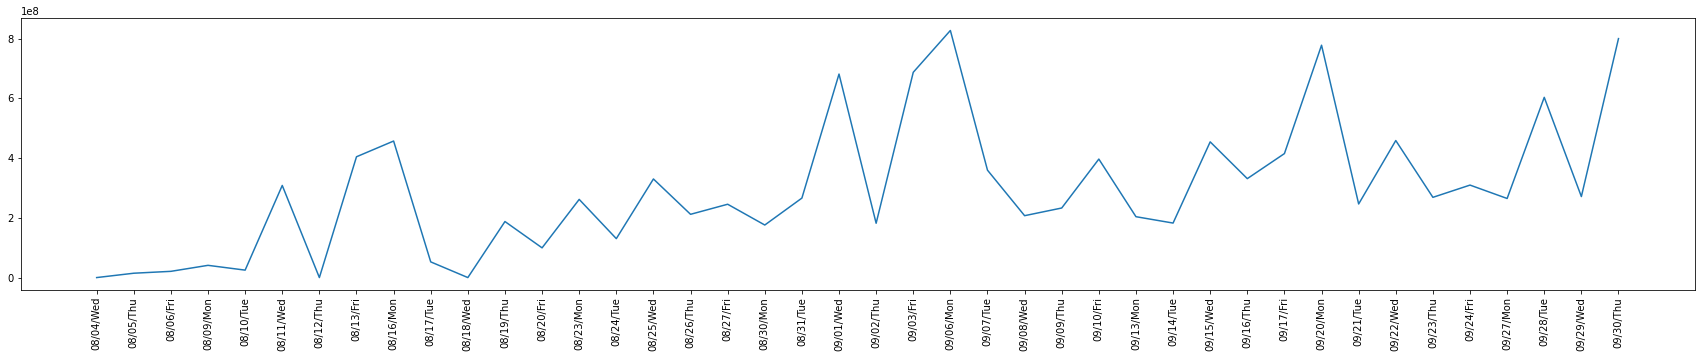

In [ ]:
##Seeing a daily trend
buy_trend = df_eda[['date','total_buy_transaction_amount']]    #Choose the variable we need to make the chart
buy_trend['date'] = buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data

buy_trend = buy_trend.sort_values('date')  #Sort the values by the issue month, ascending
buy_trend = buy_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
buy_trend = buy_trend.reset_index()
# sort by date
buy_trend = buy_trend.sort_values('date')

plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(buy_trend['date'], buy_trend['total_buy_transaction_amount'])

plt.show()

Insight
* Lowest Buy Transaction Amount at 08/04
* Highest  Buy Transaction Amount at 09/03 and 09/30
* Overall the trend is Uptrend

### Sell Transaction

<ipython-input-949-4c9c6f3f77b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_trend['date'] = sell_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data


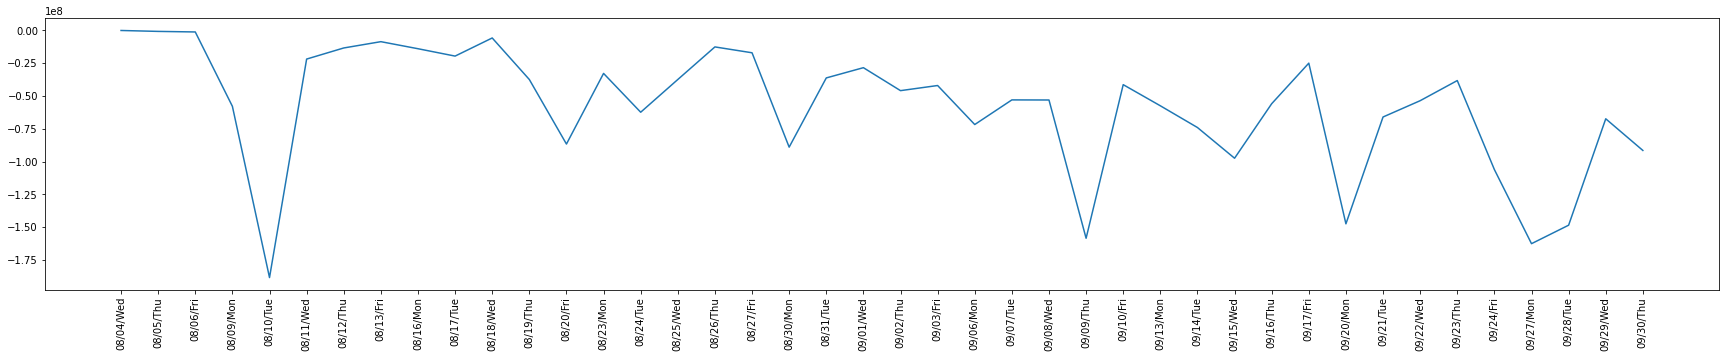

In [ ]:
##Seeing a daily trend
sell_trend = df_eda[['date','total_sell_transaction_amount']]    #Choose the variable we need to make the chart
sell_trend['date'] = sell_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data

sell_trend = sell_trend.sort_values('date')  #Sort the values by the issue month, ascending
sell_trend = sell_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
sell_trend = sell_trend.reset_index()
# sort by date
sell_trend = sell_trend.sort_values('date')

plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(sell_trend['date'], sell_trend['total_sell_transaction_amount'])

plt.show()

Insight
* Lowest sell Transaction Amount at 08/04
* Highest  sell Transaction Amount at 08/10
* Overall the trend is Downtrend

## **QUESTION 5** : How Trend Transaction of each product

### Saham

### Pasar Uang

<ipython-input-950-5126066b8e78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasar_uang_buy_trend['date'] = pasar_uang_buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data


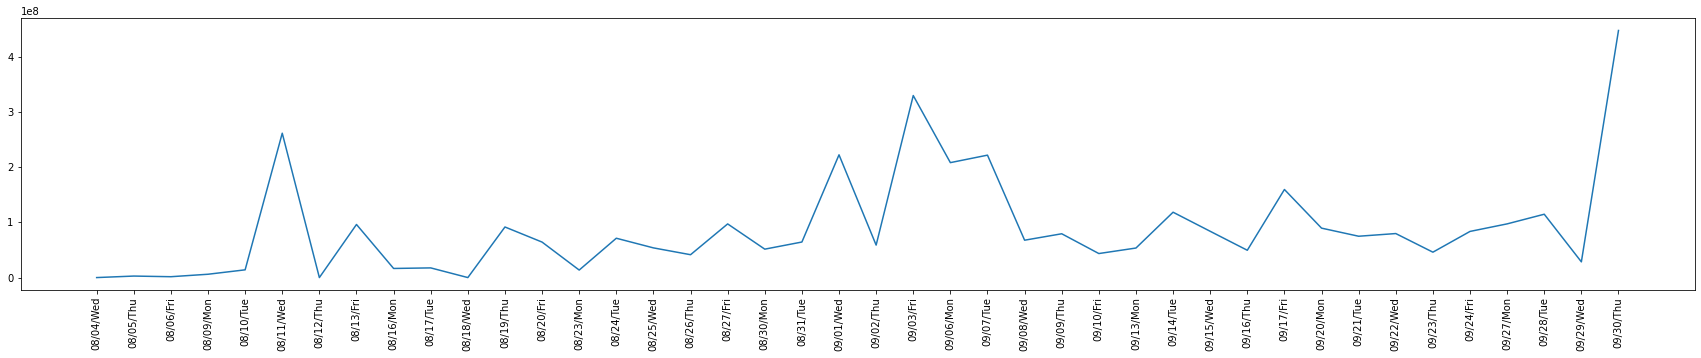

In [ ]:
##Seeing a daily trend
pasar_uang_buy_trend = df_eda[['date','buy_pasar_uang_transaction_amount']]    #Choose the variable we need to make the chart
pasar_uang_buy_trend['date'] = pasar_uang_buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data

pasar_uang_buy_trend = pasar_uang_buy_trend.sort_values('date')  #Sort the values by the issue month, ascending
pasar_uang_buy_trend = pasar_uang_buy_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
pasar_uang_buy_trend = pasar_uang_buy_trend.reset_index()
# sort by date
pasar_uang_buy_trend = pasar_uang_buy_trend.sort_values('date')

plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(pasar_uang_buy_trend['date'], pasar_uang_buy_trend['buy_pasar_uang_transaction_amount'])

plt.show()

Insight
* Lowest Buy Pasar Uang Amount at 08/04
* Highest  Buy Pasar Uang Amount at 09/29 and 09/30
* Overall the trend is Uptrend

<ipython-input-951-d4239b78a4a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasar_uang_sell_trend['date'] = pasar_uang_sell_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data


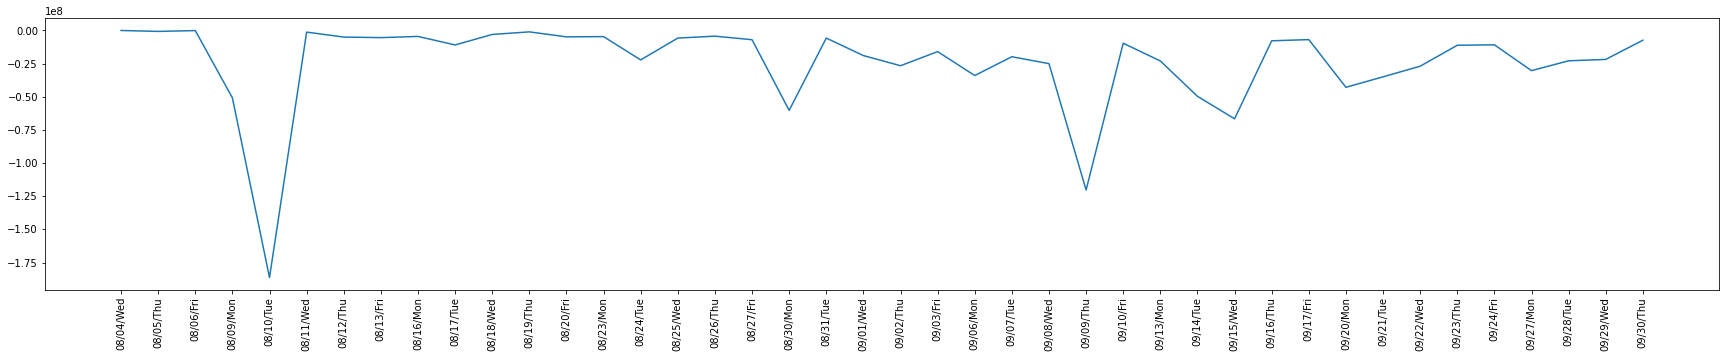

In [ ]:
##Seeing a daily trend
pasar_uang_sell_trend = df_eda[['date','sell_pasar_uang_transaction_amount']]    #Choose the variable we need to make the chart
pasar_uang_sell_trend['date'] = pasar_uang_sell_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data

pasar_uang_sell_trend = pasar_uang_sell_trend.sort_values('date')  #Sort the values by the issue month, ascending
pasar_uang_sell_trend = pasar_uang_sell_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
pasar_uang_sell_trend = pasar_uang_sell_trend.reset_index()
# sort by date
pasar_uang_sell_trend = pasar_uang_sell_trend.sort_values('date')

plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(pasar_uang_sell_trend['date'], pasar_uang_sell_trend['sell_pasar_uang_transaction_amount'])

plt.show()

Insight
* Lowest Sell Pasar Uang Amount at 08/04 and 08/11
* Highest  Sell Pasar Uang Amount at 08/10
* Overall the trend is Stable

### Pendapatan Tetap

<ipython-input-952-3b921492b94e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendapatan_tetap_buy_trend['date'] = pendapatan_tetap_buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data


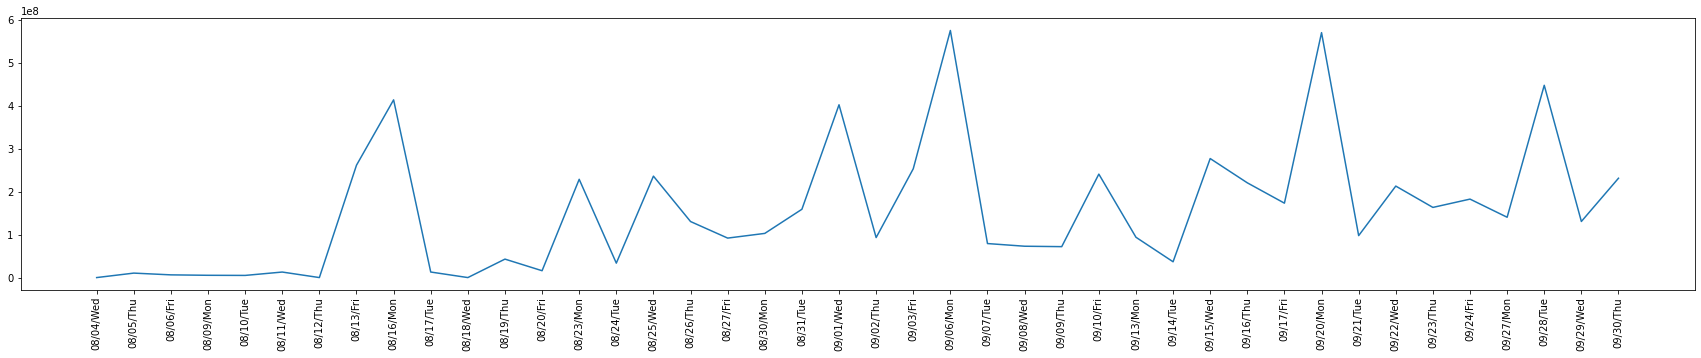

In [ ]:
##Seeing a daily trend
pendapatan_tetap_buy_trend = df_eda[['date','buy_pendapatan_tetap_transaction_amount']]    #Choose the variable we need to make the chart
pendapatan_tetap_buy_trend['date'] = pendapatan_tetap_buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data

pendapatan_tetap_buy_trend = pendapatan_tetap_buy_trend.sort_values('date')  #Sort the values by the issue month, ascending
pendapatan_tetap_buy_trend = pendapatan_tetap_buy_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
pendapatan_tetap_buy_trend = pendapatan_tetap_buy_trend.reset_index()
# sort by date
pendapatan_tetap_buy_trend = pendapatan_tetap_buy_trend.sort_values('date')

plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(pendapatan_tetap_buy_trend['date'], pendapatan_tetap_buy_trend['buy_pendapatan_tetap_transaction_amount'])

plt.show()

Insight
* Lowest Buy Pendapatan Tetap Amount at 08/04
* Highest  Buy Pendapatan Tetap Amount at 09/06 and 09/20
* Overall the trend is Uptrend

<ipython-input-953-75305222fe55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendapatan_tetap_sell_trend['date'] = pendapatan_tetap_sell_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data


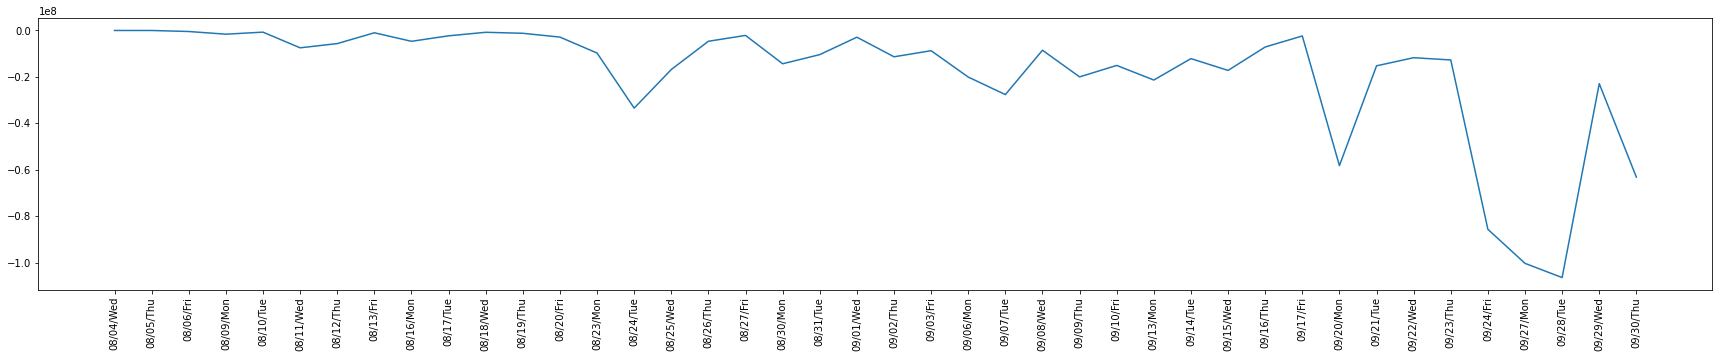

In [ ]:
##Seeing a daily trend
pendapatan_tetap_sell_trend = df_eda[['date','sell_pendapatan_tetap_transaction_amount']]    #Choose the variable we need to make the chart
pendapatan_tetap_sell_trend['date'] = pendapatan_tetap_sell_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data

pendapatan_tetap_sell_trend = pendapatan_tetap_sell_trend.sort_values('date')  #Sort the values by the issue month, ascending
pendapatan_tetap_sell_trend = pendapatan_tetap_sell_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
pendapatan_tetap_sell_trend = pendapatan_tetap_sell_trend.reset_index()
# sort by date
pendapatan_tetap_sell_trend = pendapatan_tetap_sell_trend.sort_values('date')

plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(pendapatan_tetap_sell_trend['date'], pendapatan_tetap_sell_trend['sell_pendapatan_tetap_transaction_amount'])

plt.show()

Insight
* Lowest Sell Pendapatan tetap Amount at 08/04
* Highest  Sell Pendapatan tetap Amount at 09/28
* Overall the trend is Stable at first and Continue to Downtrend

### Campuran

<ipython-input-954-12c4068b9d81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campuran_buy_trend['date'] = campuran_buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data


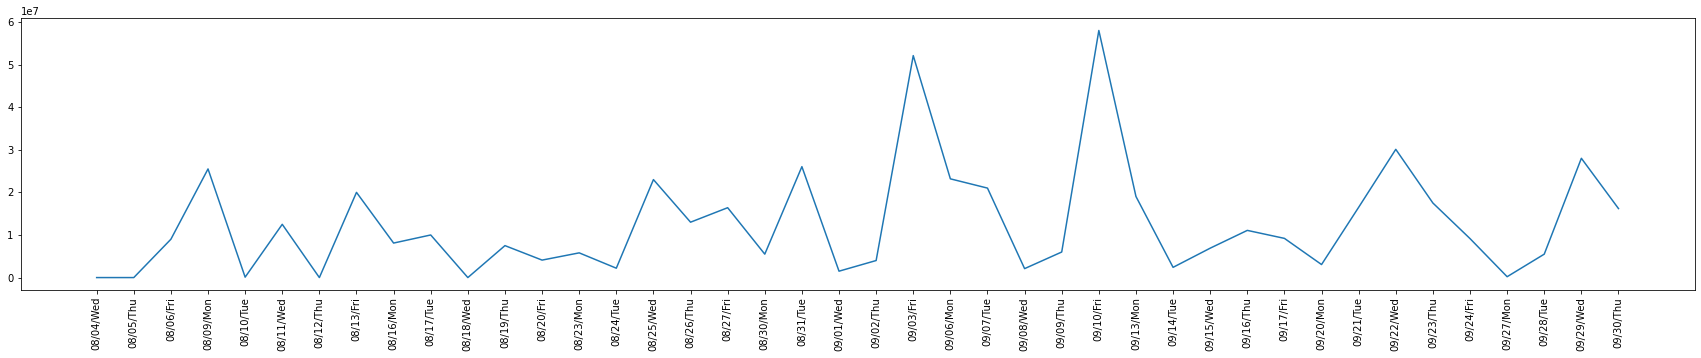

In [ ]:
##Seeing a daily trend
campuran_buy_trend = df_eda[['date','buy_campuran_transaction_amount']]    #Choose the variable we need to make the chart
campuran_buy_trend['date'] = campuran_buy_trend['date'].dt.strftime('%m/%d/%a')   #Change the issue month into year,month format to get monthly data

campuran_buy_trend = campuran_buy_trend.sort_values('date')  #Sort the values by the issue month, ascending
campuran_buy_trend = campuran_buy_trend.groupby('date').sum() #count the buy transaction and group it by the month_date_day
campuran_buy_trend = campuran_buy_trend.reset_index()
# sort by date
campuran_buy_trend = campuran_buy_trend.sort_values('date')

plt.figure(figsize =(30, 5))

plt.xticks(rotation = 90)
plt.plot(campuran_buy_trend['date'], campuran_buy_trend['buy_campuran_transaction_amount'])

plt.show()

Insight
* Lowest Buy Campuran Amount at 08/04
* Highest  Buy Campuran Amount at 09/10
* Overall the trend is Uptrend

### Total amount per product trend

In [ ]:
#For demographic and transaction summary, we use user dataset
#Create a copy for EDA, and its easier if there is something forgotten and needed to be clean later
df_trans_trend = df_eda.copy()

In [ ]:
invest_amount_trend = df_trans_trend[['date','saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',]]    #Pick variable that wanted to be analyzed
invest_amount_trend['year_month_day'] = invest_amount_trend['date'].dt.strftime('%Y/%m/%d')   #Change the format into year/month
invest_amount_trend= invest_amount_trend.groupby('year_month_day')['saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount'].sum()
invest_amount_trend=invest_amount_trend.reset_index()
invest_amount_trend.head()

<ipython-input-956-915dd9801af0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invest_amount_trend['year_month_day'] = invest_amount_trend['date'].dt.strftime('%Y/%m/%d')   #Change the format into year/month
<ipython-input-956-915dd9801af0>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  invest_amount_trend= invest_amount_trend.groupby('year_month_day')['saham_invested_amount', 'pasar_uang_invested_amount',


,year_month_day,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,2021/08/04,20490000.000,12390026.000,10278300.000,11000000.000
1,2021/08/05,31956600.000,30285034.000,44224366.000,22300000.000
2,2021/08/06,54350600.000,85226145.000,100456210.000,46900000.000
3,2021/08/09,80809492.000,241933789.000,134713186.000,86000000.000
4,2021/08/10,97589486.000,90545504.000,170599186.000,132200000.000


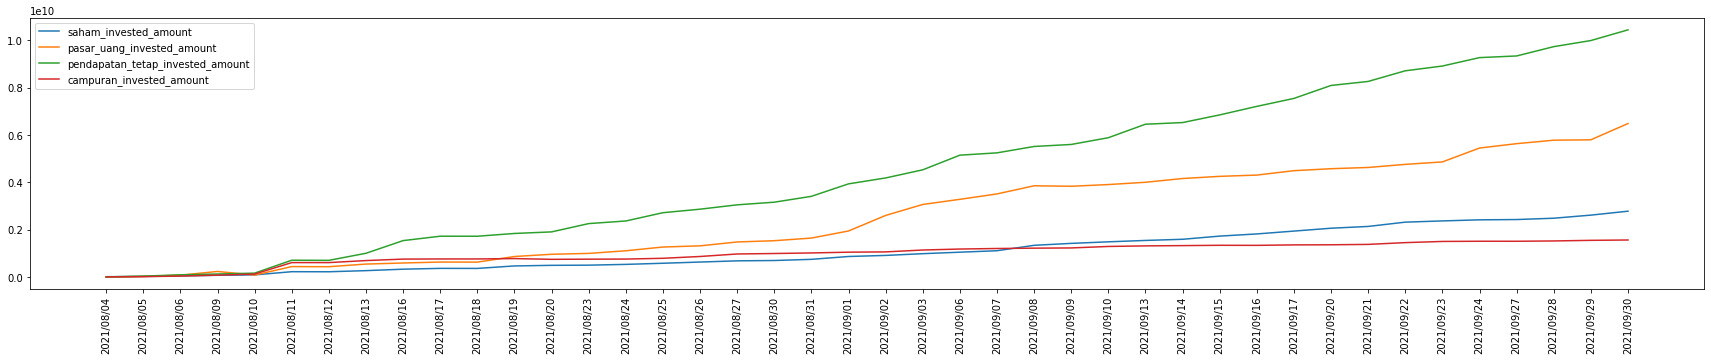

In [ ]:
#Create line chart
plt.figure(figsize =(30, 5))
axis = invest_amount_trend.columns.tolist()
#axis.head()

for x in axis[1:]:
  plt.plot(invest_amount_trend['year_month_day'], invest_amount_trend[x])

plt.xticks(rotation = 90)
plt.legend(invest_amount_trend.iloc[:,1:],loc = 2)

plt.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

invest_amount_trend_desc = invest_amount_trend[['saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount']].describe()
invest_amount_trend_desc

,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
count,42.000,42.000,42.000,42.000
mean,1119457186.167,2624448103.238,4496291682.738,995231072.548
std,853030105.975,2004240303.961,3256405193.496,450823750.747
min,20490000.000,12390026.000,10278300.000,11000000.000
25%,397705523.500,696979185.250,1757874577.750,763565511.250
50%,895765667.000,2277369040.000,4062376142.500,1061246184.000
75%,1802127986.250,4294575515.250,7117297032.000,1344972036.000
max,2784778474.000,6483775454.000,10435840244.000,1569102329.000


Overall, invest amount for all product is increase.

Bond have the highest total amount, follow by money market and then stocks. Mixed-investment is in the lowest total amount. But, before September 08, 2021 Mixed-investment has more total amount than stocks.

In [ ]:
product_rank = invest_amount_trend_desc.T
product_rank.head()

,count,mean,std,min,25%,50%,75%,max
saham_invested_amount,42.000,1119457186.167,853030105.975,20490000.000,397705523.500,895765667.000,1802127986.250,2784778474.000
pasar_uang_invested_amount,42.000,2624448103.238,2004240303.961,12390026.000,696979185.250,2277369040.000,4294575515.250,6483775454.000
pendapatan_tetap_invested_amount,42.000,4496291682.738,3256405193.496,10278300.000,1757874577.750,4062376142.500,7117297032.000,10435840244.000
campuran_invested_amount,42.000,995231072.548,450823750.747,11000000.000,763565511.250,1061246184.000,1344972036.000,1569102329.000


# E) Segmentation

## Data Preparation


In [ ]:
#Make a copy of the clean data for segmentation
df_segmentation = df_merged.copy() # we use data that we cleaned from outliers and value unique by user id
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   registration_import_datetime              158811 non-null  datetime64[ns]
 2   user_gender                               158811 non-null  object        
 3   user_age                                  158811 non-null  int64         
 4   user_occupation                           158811 non-null  object        
 5   user_income_range                         158811 non-null  object        
 6   referral_code_used                        158811 non-null  object        
 7   user_income_source                        158811 non-null  object        
 8   end_of_month_invested_amount              158811 non-null  int64         
 9   total_buy_amoun

### Feature Engineering

Here we want to create our cluster using these feature :
* Total buy amount
* Total sell amount

In [ ]:
df_segmentation.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
1,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
2,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
3,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000
4,50701,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,not used referral,Gaji,10000000,0,...,0.000,0.000,0.000,0,0,0.000,0.000,0.000,10000000.000,10000000


In [ ]:
df_for_merged = df_segmentation[['user_id','user_gender','user_occupation','user_income_range','referral_code_used','age_category','total_invested_amount']]
df_for_merged = df_for_merged.drop_duplicates(subset = "user_id", keep ='last')
df_for_merged = df_for_merged.reset_index()
df_for_merged

,index,user_id,user_gender,user_occupation,user_income_range,referral_code_used,age_category,total_invested_amount
0,23,50701,Female,IRT,Rp 10 Juta - 50 Juta,not used referral,Adult,10000000
1,46,50961,Female,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Adult,4100000
2,74,53759,Male,Swasta,< 10 Juta,not used referral,Adult,100000
3,99,54759,Male,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Adult,12000000
4,136,61414,Male,Pelajar,< 10 Juta,not used referral,Elderly,0
...,...,...,...,...,...,...,...,...
8272,158806,4165020,Male,Others,< 10 Juta,used referral,Teenager,0
8273,158807,4165132,Male,Pelajar,< 10 Juta,used referral,Teenager,10000
8274,158808,4165630,Female,Swasta,Rp 10 Juta - 50 Juta,not used referral,Adult,100000
8275,158809,4165704,Male,Swasta,Rp 10 Juta - 50 Juta,used referral,Teenager,10000


In [ ]:
# Let's keep some variable and choose that important to make segmentation.
# Variable that can represent in other way, like buy and sell by product in total buy and sell variable can be removed
_df_segmentation = df_segmentation[['user_id','total_buy_transaction_amount','total_sell_transaction_amount']]
df_sum_buy_total = _df_segmentation.groupby('user_id')[['total_buy_transaction_amount','total_sell_transaction_amount']].sum()   # We sum all the buy and sell column, because the value is not cumulative.
df_sum_buy_total = df_sum_buy_total.reset_index()
df_sum_buy_total

,user_id,total_buy_transaction_amount,total_sell_transaction_amount
0,1004326,0,0
1,1005053,0,0
2,1005165,0,0
3,1018814,0,-1300000
4,1023627,0,0
...,...,...,...
8272,988940,0,0
8273,989618,2000000,0
8274,990466,1500000,0
8275,99245,0,0


In [ ]:
# We make df to collect sum of buy and sell in every products by users id

df_sum_buy_total = df_sum_buy_total.merge(df_for_merged, how= 'inner', left_on =['user_id'], right_on = ['user_id'])
df_sum_buy_total

,user_id,total_buy_transaction_amount,total_sell_transaction_amount,index,user_gender,user_occupation,user_income_range,referral_code_used,age_category,total_invested_amount
0,1004326,0,0,5076,Female,Pelajar,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000
1,1005053,0,0,5078,Male,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000
2,1005165,0,0,5099,Female,Pelajar,< 10 Juta,not used referral,Teenager,100000
3,1018814,0,-1300000,5122,Male,Others,< 10 Juta,not used referral,Teenager,0
4,1023627,0,0,5156,Male,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Adult,100000
...,...,...,...,...,...,...,...,...,...,...
8272,988940,0,0,4952,Male,Swasta,Rp 10 Juta - 50 Juta,not used referral,Adult,500000
8273,989618,2000000,0,4982,Male,Pelajar,< 10 Juta,not used referral,Adult,3000000
8274,990466,1500000,0,5006,Male,Swasta,< 10 Juta,not used referral,Adult,2000000
8275,99245,0,0,374,Male,Pelajar,< 10 Juta,not used referral,Teenager,1000000


In [ ]:
df_sum_buy_total.columns

Index(['user_id', 'total_buy_transaction_amount',
       'total_sell_transaction_amount', 'index', 'user_gender',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'age_category', 'total_invested_amount'],
      dtype='object')

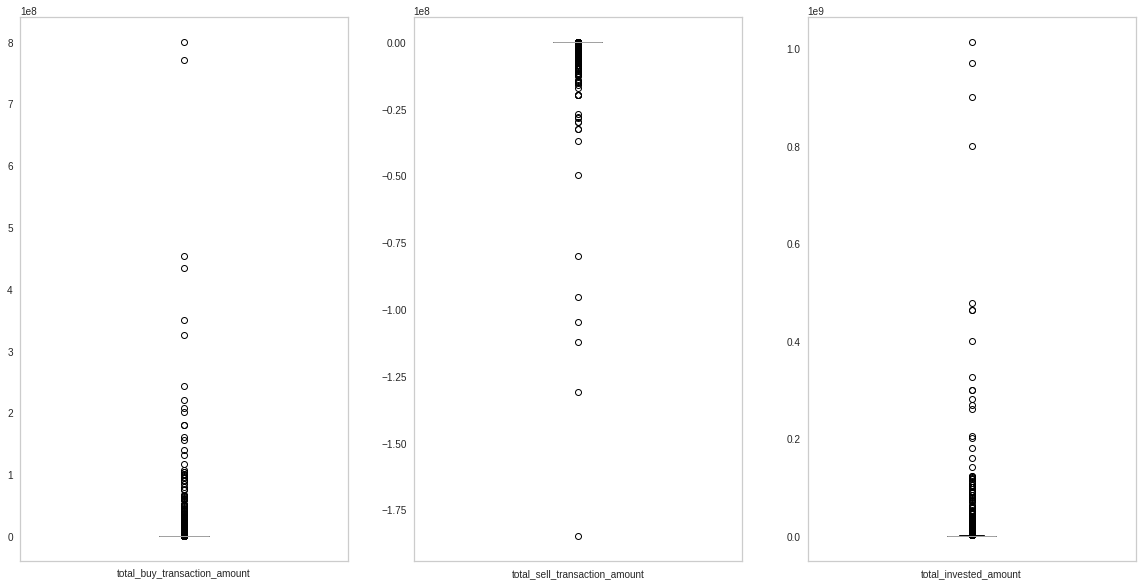

In [ ]:
# filter numeric column
feature = ['total_buy_transaction_amount','total_sell_transaction_amount', 'total_invested_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = df_sum_buy_total.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [ ]:
#Check the Q1,Q3,IQR,UB & LB
#tst = total sell transaction
print('Outlier Detection "total_invested_amount":\n')
tst_Q1 = df_sum_buy_total["total_invested_amount"].quantile(0.25)
print("Q1 =",tst_Q1)

tst_Q3 = df_sum_buy_total["total_invested_amount"].quantile(0.75)
print("Q3 =",tst_Q3)

tst_IQR = tst_Q3 - tst_Q1
print("IQR =",tst_IQR)

tst_LB = tst_Q1-1.5*tst_IQR
print("LB =",tst_LB)

tst_UB = tst_Q3+1.5*tst_IQR
print("UB =",tst_UB)

Outlier Detection "total_invested_amount":

Q1 = 0.0
Q3 = 500000.0
IQR = 500000.0
LB = -750000.0
UB = 1250000.0


In [ ]:
# Removing/Excluding the outlier
df_sum_buy_total_cl = df_sum_buy_total[~((df_sum_buy_total["total_invested_amount"] < tst_LB) | (df_sum_buy_total["total_invested_amount"] > tst_UB))]
df_sum_buy_total_cl.shape

(7083, 10)

## Libraries

In [ ]:
# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to scalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

## EDA

Exploring Data:
- summary data overview
- categorical encoding
- standardize the data

In [ ]:
df_sum_buy_total_cl

,user_id,total_buy_transaction_amount,total_sell_transaction_amount,index,user_gender,user_occupation,user_income_range,referral_code_used,age_category,total_invested_amount
0,1004326,0,0,5076,Female,Pelajar,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000
1,1005053,0,0,5078,Male,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000
2,1005165,0,0,5099,Female,Pelajar,< 10 Juta,not used referral,Teenager,100000
3,1018814,0,-1300000,5122,Male,Others,< 10 Juta,not used referral,Teenager,0
4,1023627,0,0,5156,Male,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Adult,100000
...,...,...,...,...,...,...,...,...,...,...
8270,981852,0,0,4917,Female,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Teenager,100000
8271,984729,20000,-60000,4940,Male,Swasta,< 10 Juta,not used referral,Adult,0
8272,988940,0,0,4952,Male,Swasta,Rp 10 Juta - 50 Juta,not used referral,Adult,500000
8275,99245,0,0,374,Male,Pelajar,< 10 Juta,not used referral,Teenager,1000000


In [ ]:
df_sum_buy_total_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7083 entries, 0 to 8276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   user_id                        7083 non-null   object
 1   total_buy_transaction_amount   7083 non-null   int64 
 2   total_sell_transaction_amount  7083 non-null   int64 
 3   index                          7083 non-null   int64 
 4   user_gender                    7083 non-null   object
 5   user_occupation                7083 non-null   object
 6   user_income_range              7083 non-null   object
 7   referral_code_used             7083 non-null   object
 8   age_category                   7083 non-null   object
 9   total_invested_amount          7083 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 608.7+ KB


In [ ]:
df_for_merged = df_sum_buy_total_cl[['user_id','total_buy_transaction_amount','total_sell_transaction_amount']]

## Check Data Distribution

### No Scale

<AxesSubplot:xlabel='total_buy_transaction_amount', ylabel='total_sell_transaction_amount'>

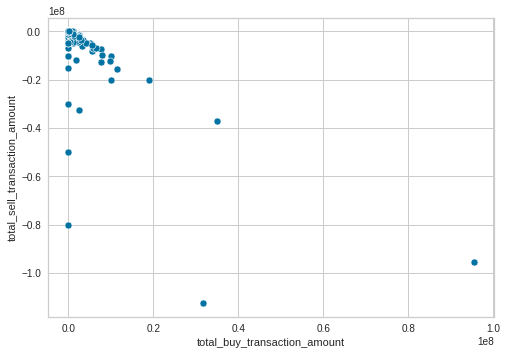

In [ ]:
sns.scatterplot(data = df_sum_buy_total_cl, x='total_buy_transaction_amount', y='total_sell_transaction_amount')

### Standard Scaler

In [ ]:
# Define Standard Scale dataset
ss_scale_df = df_sum_buy_total_cl.copy()
column = ['total_buy_transaction_amount','total_sell_transaction_amount']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<AxesSubplot:xlabel='total_buy_transaction_amount', ylabel='total_sell_transaction_amount'>

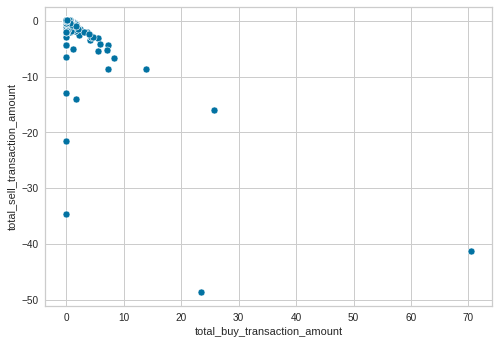

In [ ]:
sns.scatterplot (data = ss_scale_df, x='total_buy_transaction_amount', y='total_sell_transaction_amount')

In [ ]:
a = ss_scale_df[['total_buy_transaction_amount', 'total_sell_transaction_amount']]
a

,total_buy_transaction_amount,total_sell_transaction_amount
0,-0.097,0.082
1,-0.097,0.082
2,-0.097,0.082
3,-0.097,-0.481
4,-0.097,0.082
...,...,...
8270,-0.097,0.082
8271,-0.083,0.056
8272,-0.097,0.082
8275,-0.097,0.082


### Robust Scaler

In [ ]:
# Define Robust Scale dataset
rs_scale_df = df_sum_buy_total_cl.copy()
column = df_sum_buy_total_cl.columns.to_list()
# using RobustScaler Scaler
rs_scaler = RobustScaler()
rs_scale_df[['total_buy_transaction_amount', 'total_sell_transaction_amount']] = rs_scaler.fit_transform(rs_scale_df[['total_buy_transaction_amount', 'total_sell_transaction_amount']])

<AxesSubplot:xlabel='total_buy_transaction_amount', ylabel='total_sell_transaction_amount'>

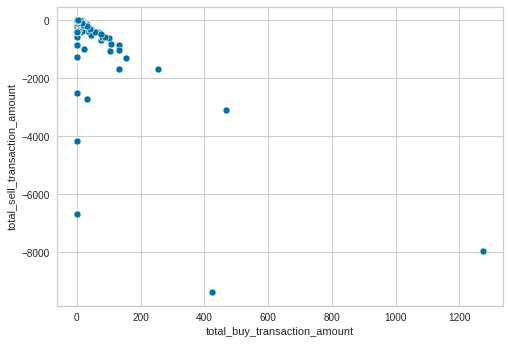

In [ ]:
sns.scatterplot (data = rs_scale_df, x='total_buy_transaction_amount', y='total_sell_transaction_amount')

### MinMax Scaler

In [ ]:
# Define Minmax Scale dataset
mm_scale_df = df_sum_buy_total_cl.copy()
column = df_sum_buy_total_cl.columns.to_list()
# using Minmax Scaler
mm_scaler = MinMaxScaler()
mm_scale_df[['total_buy_transaction_amount', 'total_sell_transaction_amount']] = mm_scaler.fit_transform(mm_scale_df[['total_buy_transaction_amount', 'total_sell_transaction_amount']])

<AxesSubplot:xlabel='total_buy_transaction_amount', ylabel='total_sell_transaction_amount'>

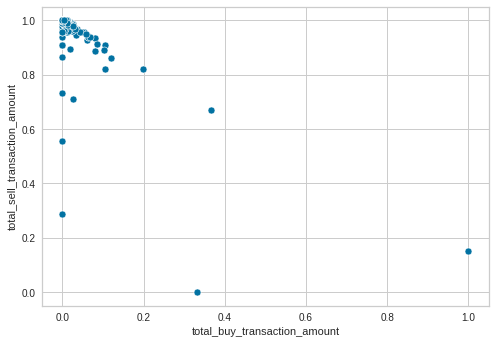

In [ ]:
sns.scatterplot (data = mm_scale_df, x='total_buy_transaction_amount', y='total_sell_transaction_amount')

## Cluster

### Elbow Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

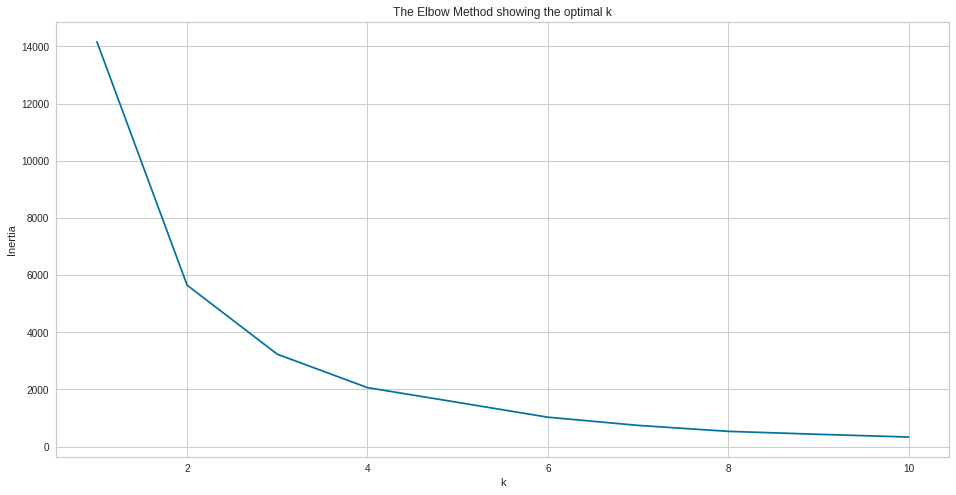

[14165.999999999818, 5649.138010693583, 3234.148192741129, 2065.4325958931863, 1549.713844770438, 1030.9063571064767, 744.2652069186161, 535.9618304927366, 432.4277160440524, 337.0907884001878]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(a)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

### Silhouette analysis

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.9950605459151115


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.9932204277550261


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.9844625358780092


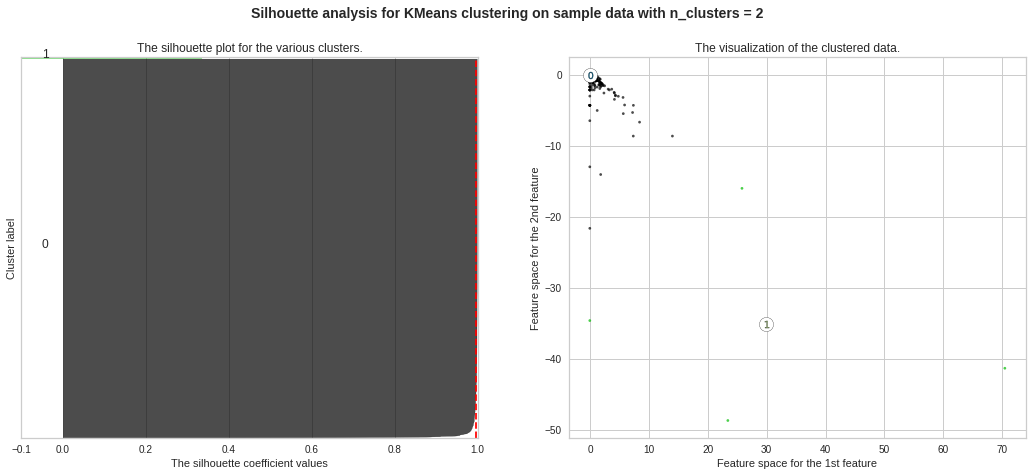

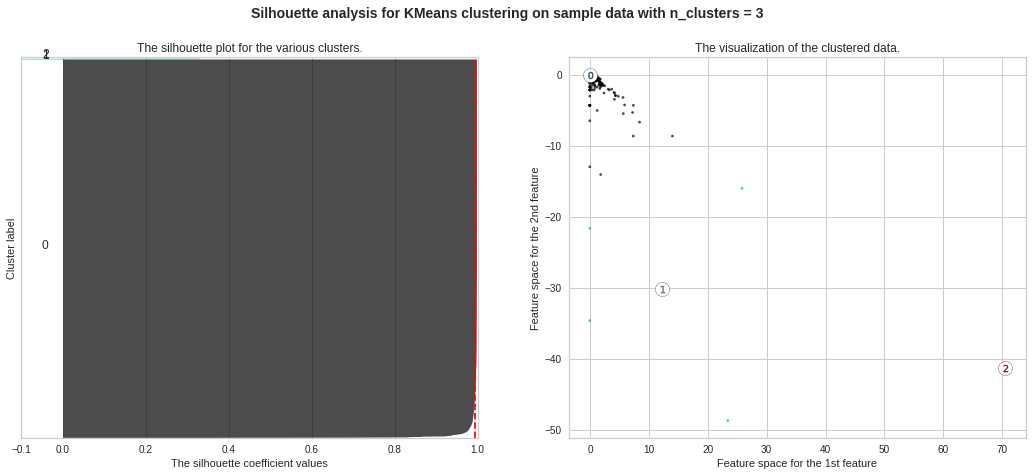

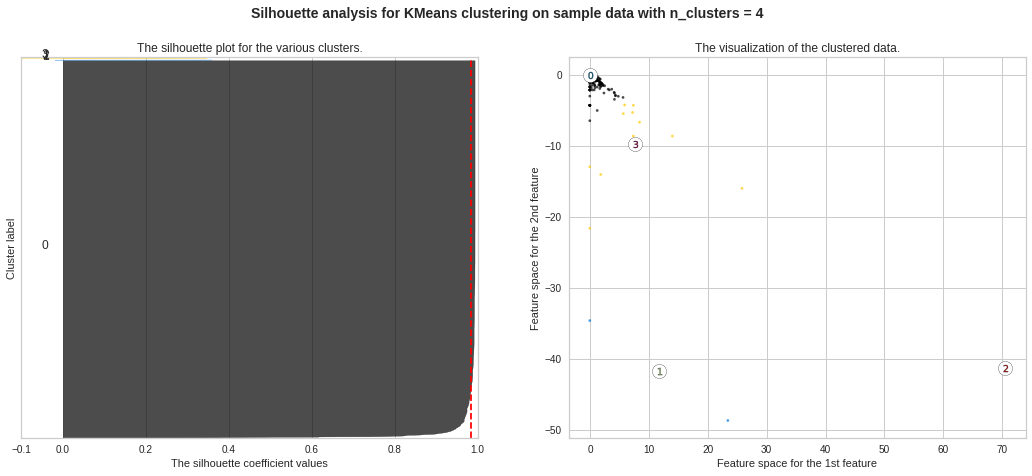

In [ ]:
silhoutte_analysis(ss_scale_df[['total_buy_transaction_amount', 'total_sell_transaction_amount']],list(range(2,5)))

## Segmentation

Cluster 4

In [ ]:
# make cluster
Cluster_4 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=4)   #------ Yang di ubah
cluster_model.fit_predict(Cluster_4[['total_buy_transaction_amount', 'total_sell_transaction_amount']])
Cluster_4['cluster'] = cluster_model.labels_
Cluster_4.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,total_buy_transaction_amount,total_sell_transaction_amount,index,user_gender,user_occupation,user_income_range,referral_code_used,age_category,total_invested_amount,cluster
0,1004326,-0.097,0.082,5076,Female,Pelajar,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000,0
1,1005053,-0.097,0.082,5078,Male,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000,0
2,1005165,-0.097,0.082,5099,Female,Pelajar,< 10 Juta,not used referral,Teenager,100000,0
3,1018814,-0.097,-0.481,5122,Male,Others,< 10 Juta,not used referral,Teenager,0,0
4,1023627,-0.097,0.082,5156,Male,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Adult,100000,0


<AxesSubplot:xlabel='cluster', ylabel='total_buy_transaction_amount'>

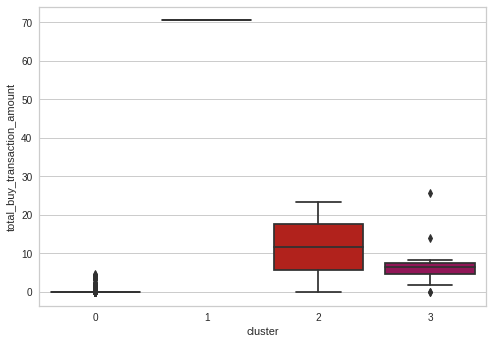

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='total_buy_transaction_amount')

<AxesSubplot:xlabel='cluster', ylabel='total_sell_transaction_amount'>

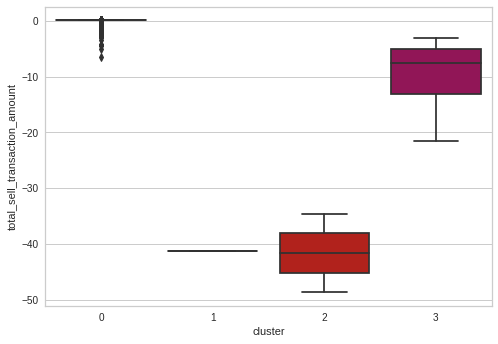

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_4 , x ='cluster' , y ='total_sell_transaction_amount')

Cluster 3

In [ ]:
# make cluster
Cluster_3 = ss_scale_df.copy()

cluster_model = KMeans(n_clusters=3)
cluster_model.fit_predict(Cluster_3[['total_buy_transaction_amount', 'total_sell_transaction_amount']])
Cluster_3['cluster'] = cluster_model.labels_
Cluster_3.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,total_buy_transaction_amount,total_sell_transaction_amount,index,user_gender,user_occupation,user_income_range,referral_code_used,age_category,total_invested_amount,cluster
0,1004326,-0.097,0.082,5076,Female,Pelajar,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000,0
1,1005053,-0.097,0.082,5078,Male,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000,0
2,1005165,-0.097,0.082,5099,Female,Pelajar,< 10 Juta,not used referral,Teenager,100000,0
3,1018814,-0.097,-0.481,5122,Male,Others,< 10 Juta,not used referral,Teenager,0,0
4,1023627,-0.097,0.082,5156,Male,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Adult,100000,0


<AxesSubplot:xlabel='cluster', ylabel='total_buy_transaction_amount'>

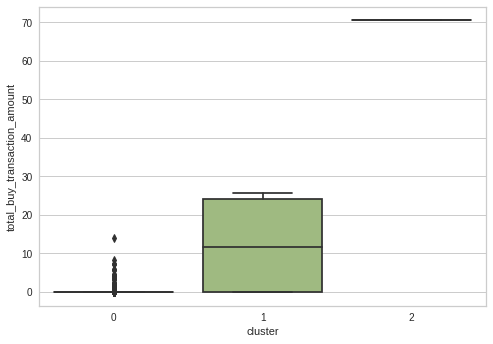

In [ ]:
# Number of transaction
sns.boxplot (data = Cluster_3 , x ='cluster' , y ='total_buy_transaction_amount')

<AxesSubplot:xlabel='cluster', ylabel='total_sell_transaction_amount'>

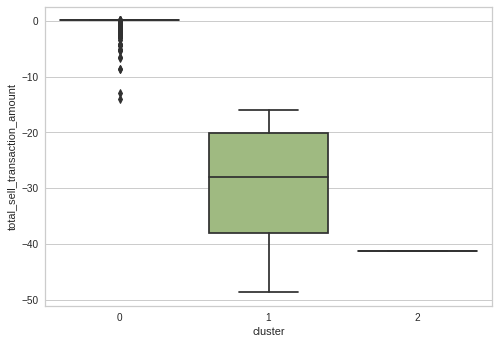

In [ ]:
# Number of transaction
sns.boxplot (data =Cluster_3 , x ='cluster' , y ='total_sell_transaction_amount')

##Merge Hasil cluster dengan dataset

In [ ]:
df_segmented = Cluster_3.merge(df_for_merged,how= 'inner', left_on =['user_id'], right_on = ['user_id'])
df_segmented

,user_id,total_buy_transaction_amount_x,total_sell_transaction_amount_x,index,user_gender,user_occupation,user_income_range,referral_code_used,age_category,total_invested_amount,cluster,total_buy_transaction_amount_y,total_sell_transaction_amount_y
0,1004326,-0.097,0.082,5076,Female,Pelajar,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000,0,0,0
1,1005053,-0.097,0.082,5078,Male,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Adult,200000,0,0,0
2,1005165,-0.097,0.082,5099,Female,Pelajar,< 10 Juta,not used referral,Teenager,100000,0,0,0
3,1018814,-0.097,-0.481,5122,Male,Others,< 10 Juta,not used referral,Teenager,0,0,0,-1300000
4,1023627,-0.097,0.082,5156,Male,Swasta,> Rp 100 Juta - 500 Juta,not used referral,Adult,100000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7078,981852,-0.097,0.082,4917,Female,Swasta,> Rp 50 Juta - 100 Juta,not used referral,Teenager,100000,0,0,0
7079,984729,-0.083,0.056,4940,Male,Swasta,< 10 Juta,not used referral,Adult,0,0,20000,-60000
7080,988940,-0.097,0.082,4952,Male,Swasta,Rp 10 Juta - 50 Juta,not used referral,Adult,500000,0,0,0
7081,99245,-0.097,0.082,374,Male,Pelajar,< 10 Juta,not used referral,Teenager,1000000,0,0,0


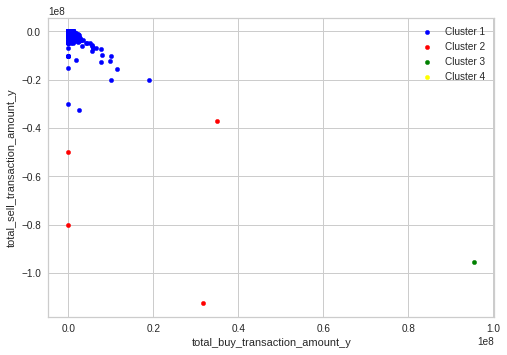

In [ ]:
cluster_scatter = df_segmented[df_segmented['cluster'] == 0].plot.scatter(x='total_buy_transaction_amount_y', y='total_sell_transaction_amount_y', c='blue', label='Cluster 1')
cluster_scatter = df_segmented[df_segmented['cluster'] == 1].plot.scatter(x='total_buy_transaction_amount_y', y='total_sell_transaction_amount_y', c='red', label='Cluster 2', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 2].plot.scatter(x='total_buy_transaction_amount_y', y='total_sell_transaction_amount_y', c='green', label='Cluster 3', ax = cluster_scatter)
cluster_scatter = df_segmented[df_segmented['cluster'] == 3].plot.scatter(x='total_buy_transaction_amount_y', y='total_sell_transaction_amount_y', c='yellow', label='Cluster 4', ax = cluster_scatter)


###Descriptive Statistic

In [ ]:
df_segmented.columns

Index(['user_id', 'total_buy_transaction_amount_x',
       'total_sell_transaction_amount_x', 'index', 'user_gender',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'age_category', 'total_invested_amount', 'cluster',
       'total_buy_transaction_amount_y', 'total_sell_transaction_amount_y'],
      dtype='object')

In [ ]:
df_segmented.groupby('cluster',as_index = False)[['total_buy_transaction_amount_y','total_sell_transaction_amount_y']].agg(['count','mean','min','max','median']).T


cluster                                            0              1  \
total_buy_transaction_amount_y  count       7078.000          4.000   
                                mean      108887.456   16687500.000   
                                min            0.000          0.000   
                                max     19000000.000   35000000.000   
                                median         0.000   15875000.000   
total_sell_transaction_amount_y count       7078.000          4.000   
                                mean     -136160.679  -69875000.000   
                                min    -32500000.000 -112500000.000   
                                max            0.000  -37000000.000   
                                median         0.000  -65000000.000   

cluster                                            2  
total_buy_transaction_amount_y  count          1.000  
                                mean    95461070.000  
                                min     95461070.000  
                                max     95461070.000  
                                median  95461070.000  
total_sell_transaction_amount_y count          1.000  
                                mean   -95500925.000  
                                min    -95500925.000  
                                max    -95500925.000  
                                median -95500925.000

* Cluster 1 : Buy transaction amount and sell transaction amount relatively small. If we see total user in this cluster, we can say most user that we have invest in small amount.
* Cluster 2 : Buy transaction amount small than sell transaction. In this cluster, user likely to sell their invest more than they buy.
* Cluster 3 : We just find 1 user that have buy and sell not difference so much in value.
* Cluster 4 : Sell amount are two times than buy amount.

In [ ]:
df_segmented.groupby(['cluster','user_occupation'], as_index = False)['user_id'].count()

,cluster,user_occupation,user_id
0,0,Guru,55
1,0,IRT,391
2,0,Others,821
3,0,PNS,73
4,0,Pelajar,3947
5,0,Pengusaha,263
6,0,Pensiunan,1
7,0,Swasta,1507
8,0,TNI/Polisi,20
9,1,PNS,1


In [ ]:
df_segmented.groupby(['cluster','user_income_range'], as_index = False)['user_id'].count().sort_values(['cluster','user_id'])

,cluster,user_income_range,user_id
1,0,> Rp 1 Miliar,8
4,0,> Rp 500 Juta - 1 Miliar,15
2,0,> Rp 100 Juta - 500 Juta,357
3,0,> Rp 50 Juta - 100 Juta,1034
5,0,Rp 10 Juta - 50 Juta,2363
0,0,< 10 Juta,3301
6,1,> Rp 100 Juta - 500 Juta,1
8,1,Rp 10 Juta - 50 Juta,1
7,1,> Rp 50 Juta - 100 Juta,2
9,2,> Rp 50 Juta - 100 Juta,1


We find user with income > 500 j

In [ ]:
df_segmented.groupby(['cluster','referral_code_used'], as_index = False)['user_id'].count().sort_values(['cluster','user_id'])

,cluster,referral_code_used,user_id
1,0,used referral,2571
0,0,not used referral,4507
2,1,not used referral,2
3,1,used referral,2
4,2,used referral,1


In [ ]:
df_segmented.groupby(['cluster','age_category'], as_index = False)['user_id'].count().sort_values(['cluster','user_id'])

,cluster,age_category,user_id
2,0,Late Adult,247
1,0,Elderly,372
0,0,Adult,2380
3,0,Teenager,4079
5,1,Elderly,1
6,1,Late Adult,1
4,1,Adult,2
7,2,Adult,1


In [ ]:
df_segmented.groupby(['cluster','total_sell_transaction_amount_y'], as_index = False)['user_id'].describe()

cluster  0      0
         1      0
         2      0
         3      0
         4      0
               ..
freq     430    1
         431    1
         432    1
         433    1
         434    1
Length: 2610, dtype: object

In [ ]:
df_segmented.groupby(['cluster','age_category'])['user_id'].agg(['count','median'])

count      median
cluster age_category                   
0       Adult          2380 3933969.000
        Elderly         372 3936689.000
        Late Adult      247 3916717.000
        Teenager       4079 3902033.000
1       Adult             2 3823095.500
        Elderly           1 3746946.000
        Late Adult        1 3662561.000
2       Adult             1 3814363.000

Summary:
- the distribution of data on each cluster is not good (the data between cluster 1 and the others is very unbalanced)
- cluster characteristic:
  - 0: Mostly Teenager, mostly Income Range '< 10 Juta', Mostly Pelajar >> can be named: "Beginner young investors"
  - 1: Age : (Adult, Elderly, Late Adult), mostly Income Range '> Rp 50 Juta - 100 Juta', Occupation : ( PNS, Swasta, Pelajar) >> can be named: "Wealthy Senior Investor"
  - 2: Mostly Adult, mostly Income Range '10 Juta-50 juta and > 100 Juta', Mostly Pelajar >> can be named: "Beginner young investors"